<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Hierarchical%20clustering%20for%20chip%20on%20wafer%20csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/CustomerW3_IT_6_Test_20210225182626301.csv",header=None)

In [3]:
print(df)

        0        1           2          3   ...   11   12   13     14
0        0        0  331.497681  38.590508  ...  0.0  0.0  0.0  54725
1        0        0  328.913696  35.928177  ...  0.0  0.0  0.0  54726
2        0        0  332.411896  43.757309  ...  0.0  0.0  0.0  54727
3        0        0  327.737640  45.355579  ...  0.0  0.0  0.0  54728
4        0        0  329.433319  41.014294  ...  0.0  0.0  0.0  54729
...     ..      ...         ...        ...  ...  ...  ...  ...    ...
678332  94  2293759  329.108093  37.959175  ...  0.0  0.0  0.0  63869
678333  94  2293759  329.762146  39.259834  ...  0.0  0.0  0.0  63870
678334  94  2293759  333.106567  39.688843  ...  0.0  0.0  0.0  63871
678335  94  2293759  328.430756  34.968334  ...  0.0  0.0  0.0  63872
678336  94  2293759  333.265350  45.473488  ...  0.0  0.0  0.0  63873

[678337 rows x 15 columns]


In [4]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [5]:
sorted(df)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [6]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [7]:
df.drop(['0','1','3','5','14', '7', '9', '11', '13'],axis='columns', inplace=True)

In [8]:
print(df)

                 2           4           6    8   10   12
0       331.497681  366.443085     0.00000  0.0  0.0  0.0
1       328.913696  362.517304  2372.15332  0.0  0.0  0.0
2       332.411896    0.000000     0.00000  0.0  0.0  0.0
3       327.737640  363.017761     0.00000  0.0  0.0  0.0
4       329.433319    0.000000     0.00000  0.0  0.0  0.0
...            ...         ...         ...  ...  ...  ...
678332  329.108093    0.000000     0.00000  0.0  0.0  0.0
678333  329.762146    0.000000     0.00000  0.0  0.0  0.0
678334  333.106567  363.926758     0.00000  0.0  0.0  0.0
678335  328.430756    0.000000     0.00000  0.0  0.0  0.0
678336  333.265350    0.000000     0.00000  0.0  0.0  0.0

[678337 rows x 6 columns]


In [9]:
df['Index'] = range(0, 0+len(df))

In [10]:
cols = df.columns.tolist()
cols

['2', '4', '6', '8', '10', '12', 'Index']

In [11]:
cols = cols[-1:] + cols[:-1]
cols

['Index', '2', '4', '6', '8', '10', '12']

In [12]:
df = df[cols]
print(df)

         Index           2           4           6    8   10   12
0            0  331.497681  366.443085     0.00000  0.0  0.0  0.0
1            1  328.913696  362.517304  2372.15332  0.0  0.0  0.0
2            2  332.411896    0.000000     0.00000  0.0  0.0  0.0
3            3  327.737640  363.017761     0.00000  0.0  0.0  0.0
4            4  329.433319    0.000000     0.00000  0.0  0.0  0.0
...        ...         ...         ...         ...  ...  ...  ...
678332  678332  329.108093    0.000000     0.00000  0.0  0.0  0.0
678333  678333  329.762146    0.000000     0.00000  0.0  0.0  0.0
678334  678334  333.106567  363.926758     0.00000  0.0  0.0  0.0
678335  678335  328.430756    0.000000     0.00000  0.0  0.0  0.0
678336  678336  333.265350    0.000000     0.00000  0.0  0.0  0.0

[678337 rows x 7 columns]


In [13]:
df2 = df.set_index('Index').stack().reset_index()

In [14]:
print(df2)

          Index level_1           0
0             0       2  331.497681
1             0       4  366.443085
2             0       6    0.000000
3             0       8    0.000000
4             0      10    0.000000
...         ...     ...         ...
4070017  678336       4    0.000000
4070018  678336       6    0.000000
4070019  678336       8    0.000000
4070020  678336      10    0.000000
4070021  678336      12    0.000000

[4070022 rows x 3 columns]


In [15]:
df3 = df2.rename(columns = {'level_1': 'Column', 0: 'Value'}, inplace = False)

In [16]:
df4 = df3.loc[~((df3['Value'] == 0))]

In [17]:
print(df4)

          Index Column        Value
0             0      2   331.497681
1             0      4   366.443085
6             1      2   328.913696
7             1      4   362.517304
8             1      6  2372.153320
...         ...    ...          ...
4069998  678333      2   329.762146
4070004  678334      2   333.106567
4070005  678334      4   363.926758
4070010  678335      2   328.430756
4070016  678336      2   333.265350

[1491755 rows x 3 columns]


In [18]:
df4_test = pd.DataFrame(df4)
selected_columns = df4_test[["Value","Column"]]

new_df = selected_columns.copy()
print(new_df)

               Value Column
0         331.497681      2
1         366.443085      4
6         328.913696      2
7         362.517304      4
8        2372.153320      6
...              ...    ...
4069998   329.762146      2
4070004   333.106567      2
4070005   363.926758      4
4070010   328.430756      2
4070016   333.265350      2

[1491755 rows x 2 columns]


In [19]:
df_plot= new_df
df_plot['num']=df_plot.index
df_plot=df_plot[df_plot['num']%50==0]

In [20]:
print(df_plot)

              Value Column      num
0        331.497681      2        0
150      329.105591      2      150
300      329.315704      2      300
450      330.067627      2      450
600      331.295105      2      600
...             ...    ...      ...
4069350  361.759003      2  4069350
4069500  329.251679      2  4069500
4069650  329.366669      2  4069650
4069800  331.729919      2  4069800
4069950  333.619995      2  4069950

[35528 rows x 3 columns]


In [21]:
test_plot = pd.DataFrame(df_plot)
selected_columns = test_plot[["Value"]]

test_plot = selected_columns.copy()
print(test_plot)

              Value
0        331.497681
150      329.105591
300      329.315704
450      330.067627
600      331.295105
...             ...
4069350  361.759003
4069500  329.251679
4069650  329.366669
4069800  331.729919
4069950  333.619995

[35528 rows x 1 columns]


Hierarchihcal clustering

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

In [23]:
X = test_plot.iloc[:, [0]].values
# X = new_df.iloc[:, [0]].values

In [24]:
test_plot.size
# new_df.size

35528

In [25]:
X.size

35528

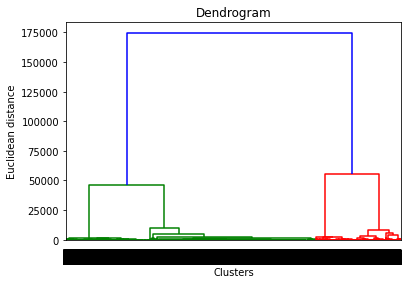

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [28]:
y_hc=hc.fit_predict(X)

In [29]:
print(y_hc)

[0 0 0 ... 0 0 0]


In [30]:
y_hc.size

35528

In [31]:
print(df_plot)

              Value Column      num
0        331.497681      2        0
150      329.105591      2      150
300      329.315704      2      300
450      330.067627      2      450
600      331.295105      2      600
...             ...    ...      ...
4069350  361.759003      2  4069350
4069500  329.251679      2  4069500
4069650  329.366669      2  4069650
4069800  331.729919      2  4069800
4069950  333.619995      2  4069950

[35528 rows x 3 columns]


In [32]:
df_plot.reset_index(drop=True, inplace=True)
print(df_plot)

            Value Column      num
0      331.497681      2        0
1      329.105591      2      150
2      329.315704      2      300
3      330.067627      2      450
4      331.295105      2      600
...           ...    ...      ...
35523  361.759003      2  4069350
35524  329.251679      2  4069500
35525  329.366669      2  4069650
35526  331.729919      2  4069800
35527  333.619995      2  4069950

[35528 rows x 3 columns]


In [33]:
new_series = pd.Series(y_hc)

In [34]:
conv_ser_df = new_series.to_frame()

In [35]:
print(conv_ser_df)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
35523  0
35524  0
35525  0
35526  0
35527  0

[35528 rows x 1 columns]


In [36]:
conv_ser_df.columns = ['labels']

In [37]:
conv_ser_df.labels.unique()

array([0, 1, 3, 2])

In [38]:
df_plot = pd.concat([df_plot, conv_ser_df], axis=1) 

In [54]:
df_plot

,Value,labels
0,331.497681,0
1,329.105591,0
2,329.315704,0
3,330.067627,0
4,331.295105,0
...,...,...
35523,361.759003,0
35524,329.251679,0
35525,329.366669,0
35526,331.729919,0


In [55]:
print(df_plot['labels'].value_counts())

0    18047
3     8512
1     4907
2     4062
Name: labels, dtype: int64


In [56]:
percent0 = 18047/ 35528 * 100
percent0

50.79655482999325

In [58]:
percent1 = 4907/ 35528 * 100
percent1

13.811641522179688

In [59]:
percent2 = 4062/ 35528 * 100
percent2

11.433235757712227

In [60]:
percent3 = 8512/ 35528 * 100
percent3

23.95856789011484

In [40]:
df_plot.drop(['Column','num'],axis='columns', inplace=True)

In [42]:
dfhc_label_0= df_plot[df_plot['labels']==0].copy()

In [ ]:
print(dfhc_label_0)

In [43]:
dfhc_label_0['Value'].()

61.014023409622816

In [45]:
dfhc_label_1= df_plot[df_plot['labels']==1].copy()

In [ ]:
print(dfhc_label_1)

In [47]:
dfhc_label_1['Value'].std()

112.58900991704087

In [48]:
dfhc_label_2= df_plot[df_plot['labels']==2].copy()

In [ ]:
print(dfhc_label_2)

In [50]:
dfhc_label_2['Value'].std()

36.790322903572864

In [51]:
dfhc_label_3= df_plot[df_plot['labels']==3].copy()

In [ ]:
dfhc_label_3

In [53]:
dfhc_label_3['Value'].std()

19.936133192681016

In [101]:
label_0_cl = dfhc_label_0.iloc[:, [0]].values

In [102]:
label_0_cl.size

18047

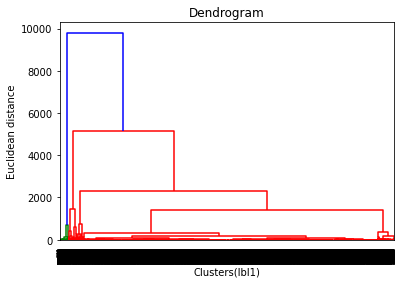

In [63]:
dendrogram = sch.dendrogram(sch.linkage(label_0_cl, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters(lbl1)')
plt.ylabel('Euclidean distance')
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering 
hc0 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [104]:
y_hc0=hc0.fit_predict(label_0_cl)

In [106]:
print(y_hc0)

[0 0 0 ... 0 0 0]


In [107]:
new_series0 = pd.Series(y_hc0)

In [108]:
conv_ser_df0 = new_series0.to_frame()

In [109]:
conv_ser_df0.columns = ['2nd labeling']

In [110]:
conv_ser_df0

,2nd labeling
0,0
1,0
2,0
3,0
4,0
...,...
18042,0
18043,0
18044,0
18045,0


In [123]:
dfhc_label_0 = pd.concat([dfhc_label_0, conv_ser_df0], axis=1) 
dfhc_label_0

,Value,labels,2nd labeling
0,331.497681,0,0
1,329.105591,0,0
2,329.315704,0,0
3,330.067627,0,0
4,331.295105,0,0
...,...,...,...
18042,361.759003,0,0
18043,329.251679,0,0
18044,329.366669,0,0
18045,331.729919,0,0


In [ ]:
# dfhc_label_0.to_csv("dfhc_label_0.csv")

In [112]:
label_3_cl = dfhc_label_3.iloc[:, [0]].values

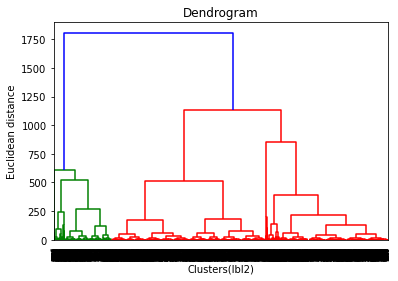

In [84]:
dendrogram = sch.dendrogram(sch.linkage(label_3_cl, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters(lbl2)')
plt.ylabel('Euclidean distance')
plt.show()

In [113]:
from sklearn.cluster import AgglomerativeClustering 
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [114]:
y_hc3=hc3.fit_predict(label_3_cl)

In [115]:
print(y_hc3)

[0 3 1 ... 1 1 3]


In [116]:
new_series3 = pd.Series(y_hc3)

In [117]:
conv_ser_df3 = new_series3.to_frame()

In [118]:
conv_ser_df3.columns = ['2nd labeling']

In [121]:
dfhc_label_3 = pd.concat([dfhc_label_3, conv_ser_df3], axis=1)
dfhc_label_3

,Value,labels,2nd labeling
0,831.440918,3,0
1,652.428223,3,3
2,722.583801,3,1
3,994.612732,3,0
4,727.532288,3,1
...,...,...,...
8507,755.810120,3,2
8508,750.708252,3,2
8509,746.219116,3,1
8510,742.307678,3,1


In [ ]:
# dfhc_label_3.to_csv("dfhc_label_2.csv")

In [99]:
dfhc_label_1['2nd labeling'] = 1
dfhc_label_1

,Value,labels,2nd labeling
0,2358.761719,1,1
1,2293.449707,1,1
2,2393.128418,1,1
3,2311.965576,1,1
4,2310.551758,1,1
...,...,...,...
4902,2298.450439,1,1
4903,2566.691406,1,1
4904,2285.279785,1,1
4905,2310.784424,1,1


In [100]:
dfhc_label_2['2nd labeling'] = 2
dfhc_label_2

,Value,labels,2nd labeling
3740,1496.938477,2,2
3741,1538.499878,2,2
3743,1529.189453,2,2
3747,1522.025635,2,2
3749,1481.627319,2,2
...,...,...,...
30200,1537.717285,2,2
30203,1536.825562,2,2
30214,1545.331299,2,2
30216,1539.624512,2,2


In [127]:
frames = [dfhc_label_0,dfhc_label_1,dfhc_label_2,dfhc_label_3]
df_finalized_cluster = pd.concat(frames, keys=['label0', 'label1', 'label2', 'label3'])
df_finalized_cluster

Value  labels  2nd labeling
label0 0     331.497681       0             0
       1     329.105591       0             0
       2     329.315704       0             0
       3     330.067627       0             0
       4     331.295105       0             0
...                 ...     ...           ...
label3 8507  755.810120       3             2
       8508  750.708252       3             2
       8509  746.219116       3             1
       8510  742.307678       3             1
       8511  623.481079       3             3

[35528 rows x 3 columns]

In [128]:
df_finalized_cluster.rename(columns={'2nd labeling':'Second_labeling'},inplace=True)
print(df_finalized_cluster)

                  Value  labels  Second_labeling
label0 0     331.497681       0                0
       1     329.105591       0                0
       2     329.315704       0                0
       3     330.067627       0                0
       4     331.295105       0                0
...                 ...     ...              ...
label3 8507  755.810120       3                2
       8508  750.708252       3                2
       8509  746.219116       3                1
       8510  742.307678       3                1
       8511  623.481079       3                3

[35528 rows x 3 columns]


In [129]:
def final_cluster(flabel,slabel):
    if (flabel==0) & (slabel ==0):
         return 0
    elif ((flabel==0) & (slabel ==1)):
         return 1
    elif ((flabel==0) & (slabel ==2)):
         return 2
    elif (flabel==1) & (slabel ==1):
         return 3
    elif (flabel==2) & (slabel ==2):
         return 4
    elif (flabel==3) & (slabel ==0):
         return 5
    elif (flabel==3) & (slabel ==1):
         return 6
    elif (flabel==3) & (slabel ==2):
         return 7
    elif (flabel==3) & (slabel ==3):
         return 8
    else:
         return 9

In [130]:
df_finalized_cluster['Final Cluster'] = df_finalized_cluster.apply(lambda x: final_cluster(x.labels,x.Second_labeling), axis=1)

In [132]:
df_finalized_cluster.head(10)

Value  labels  Second_labeling  Final Cluster
label0 0  331.497681       0                0              0
       1  329.105591       0                0              0
       2  329.315704       0                0              0
       3  330.067627       0                0              0
       4  331.295105       0                0              0
       5  328.376587       0                0              0
       6  331.447174       0                0              0
       7  331.400452       0                0              0
       8  328.885468       0                0              0
       9  331.597900       0                0              0

In [133]:
df_finalized_cluster.describe()

,Value,labels,Second_labeling,Final Cluster
count,35528.000000,35528.000000,35528.000000,35528.000000
mean,845.716772,1.085538,0.719067,2.421893
std,712.088613,1.254340,0.828718,2.630163
min,9.598228,0.000000,0.000000,0.000000
25%,330.508698,0.000000,0.000000,0.000000
50%,482.961960,0.000000,0.000000,2.000000
75%,1473.051514,2.000000,1.000000,4.000000
max,3635.074951,3.000000,3.000000,8.000000


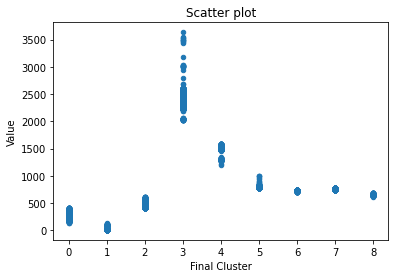

In [134]:
import matplotlib.pyplot as plot

df_finalized_cluster.plot.scatter(x="Final Cluster", y="Value", title= "Scatter plot");
plot.show(block=True);

In [ ]:
df_finalized_cluster.to_csv("df_finalized_cluster.csv")

In [135]:
df_finalized_cluster['Final Cluster'].unique()

array([0, 1, 2, 3, 4, 5, 8, 6, 7])

In [136]:
print(df_finalized_cluster['Final Cluster'].value_counts())

0    17070
3     4907
4     4062
7     3919
6     3071
5     1472
1      497
2      480
8       50
Name: Final Cluster, dtype: int64


In [137]:
percent0 = 17070 / 35528 * 100
print(percent0)

48.046611123620806


In [138]:
percent3 = 4907 / 35528 * 100
print(percent3)

13.811641522179688


In [139]:
percent4 = 4062 / 35528 * 100
print(percent4)

11.433235757712227


In [140]:
df_label_0= df_finalized_cluster[df_finalized_cluster['Final Cluster']==0].copy()

In [ ]:
df_label_0.describe()

In [142]:
df_label_0_fil = df_label_0.iloc[:, [0]].values

In [204]:
upper0 = df_label_0_fil.mean() + 3*df_label_0_fil.std()
lower0 = df_label_0_fil.mean() -3*df_label_0_fil.std()

In [205]:
new_df_label_0_fil= df_label_0_fil[(df_label_0_fil<upper0) & (df_label_0_fil>lower0)]

In [207]:
new_df_label_0_fil.size

16723

In [224]:
new_series0  = pd.Series(new_df_label_0_fil)
conv_ser_df0 = new_series0.to_frame()
conv_ser_df0.describe()

,0
count,16723.000000
mean,331.859354
std,7.362642
min,283.675293
25%,329.651901
50%,330.555328
75%,331.518555
max,377.307892


In [174]:
df_label_3= df_finalized_cluster[df_finalized_cluster['Final Cluster']==3].copy()

In [ ]:
df_label_3.describe()

In [176]:
df_label_3_fil = df_label_3.iloc[:, [0]].values

In [208]:
upper3 = df_label_3_fil.mean() + 3*df_label_3_fil.std()
lower3 = df_label_3_fil.mean() -3*df_label_3_fil.std()

In [209]:
new_df_label_3_fil= df_label_3_fil[(df_label_3_fil<upper3) & (df_label_3_fil>lower3)]

In [211]:
new_df_label_3_fil.size

4882

In [223]:
new_series3  = pd.Series(new_df_label_3_fil)
conv_ser_df3 = new_series3.to_frame()
conv_ser_df3.describe()

,0
count,4882.000000
mean,2345.326738
std,93.186949
min,2016.426392
25%,2281.963440
50%,2330.010132
75%,2403.991028
max,2686.274170


In [190]:
df_label_4= df_finalized_cluster[df_finalized_cluster['Final Cluster']==4].copy()

In [ ]:
df_label_4.describe()

In [192]:
df_label_4_fil = df_label_4.iloc[:, [0]].values

In [212]:
upper4 = df_label_4_fil.mean() + 3*df_label_4_fil.std()
lower4 = df_label_4_fil.mean() -3*df_label_4_fil.std()

In [213]:
new_df_label_4_fil= df_label_4_fil[(df_label_4_fil<upper4) & (df_label_4_fil>lower4)]

In [215]:
new_df_label_4_fil.size

4003

In [222]:
new_series4  = pd.Series(new_df_label_4_fil)
conv_ser_df4 = new_series4.to_frame()
conv_ser_df4.describe()

,0
count,4003.000000
mean,1523.341055
std,24.584263
min,1465.609985
25%,1503.128357
50%,1523.785889
75%,1544.121155
max,1593.281494


In [226]:
df_final_1= df_finalized_cluster[df_finalized_cluster['Final Cluster']==1].copy()
df_final_2= df_finalized_cluster[df_finalized_cluster['Final Cluster']==2].copy()
df_final_5= df_finalized_cluster[df_finalized_cluster['Final Cluster']==5].copy()
df_final_6= df_finalized_cluster[df_finalized_cluster['Final Cluster']==6].copy()
df_final_7= df_finalized_cluster[df_finalized_cluster['Final Cluster']==7].copy()
df_final_8= df_finalized_cluster[df_finalized_cluster['Final Cluster']==8].copy()

In [232]:
df_final_8.describe()

,Value,labels,Second_labeling,Final Cluster
count,50.000000,50.0,50.0,50.0
mean,656.171569,3.0,3.0,8.0
std,23.861995,0.0,0.0,0.0
min,622.455261,3.0,3.0,8.0
25%,635.752472,3.0,3.0,8.0
50%,652.448914,3.0,3.0,8.0
75%,680.837891,3.0,3.0,8.0
max,692.868164,3.0,3.0,8.0


In [233]:
df_final_0= df_finalized_cluster[df_finalized_cluster['Final Cluster']==0].copy()
df_final_3= df_finalized_cluster[df_finalized_cluster['Final Cluster']==3].copy()
df_final_4= df_finalized_cluster[df_finalized_cluster['Final Cluster']==4].copy()

In [237]:
df_final_0.describe()

,Value,labels,Second_labeling,Final Cluster
count,17070.000000,17070.0,17070.0,17070.0
mean,330.603642,0.0,0.0,0.0
std,15.660261,0.0,0.0,0.0
min,139.366562,0.0,0.0,0.0
25%,329.607056,0.0,0.0,0.0
50%,330.538391,0.0,0.0,0.0
75%,331.517845,0.0,0.0,0.0
max,407.009552,0.0,0.0,0.0
